In [1]:
import pandas as pd
import numpy as np

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터셋
- 막대그래프는 북한의 발전량,
- 선그래프는 북한 발전량의 전년대비 증감률을 백분율로 나타낸다.

In [2]:
df = pd.read_excel('../data/남북한발전전력량.xlsx')

In [3]:
df.tail()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [4]:
# 북한 전력량만 선택
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [5]:
df.drop('전력량 (억㎾h)', axis = 1, inplace=True)

In [6]:
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [7]:
df.set_index('발전 전력별', inplace=True)

In [8]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [9]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [10]:
# 합계 컬럼을 총발전량으로 변경
df = df.rename(columns={'합계' : '총발전량'})
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [11]:
# 증감율(변동율) 계산
# 전년도 총발전량 컬럼 생성
df['전년도 총발전량'] = df['총발전량'].shift(1)
df.head()

발전 전력별,총발전량,수력,화력,원자력,전년도 총발전량
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [12]:
# 증감율 컬럼 생성
df['총발전량 증감율'] = ((df['총발전량'] / df['전년도 총발전량']) - 1) * 100

In [13]:
df.head()

발전 전력별,총발전량,수력,화력,원자력,전년도 총발전량,총발전량 증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


In [39]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

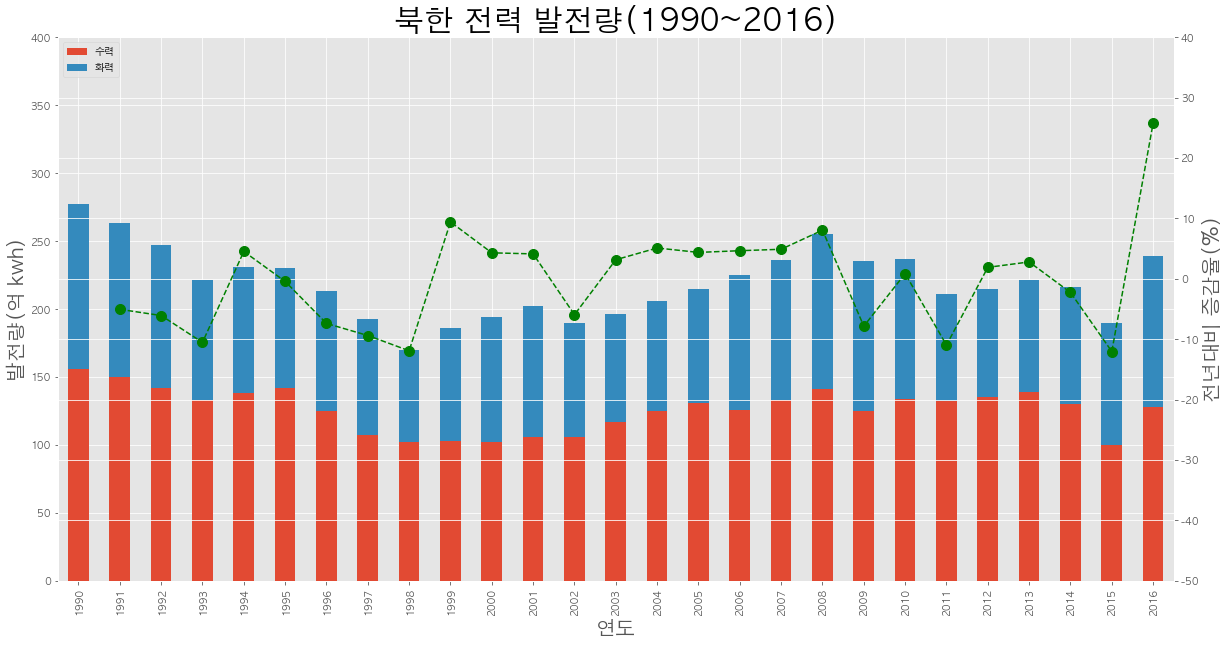

In [15]:
# 2축 그래프 그리기
plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(
    kind='bar',
    figsize=(20,10),
    stacked=True
)
ax2 = ax1.twinx()
ax2.plot(
    df.index, 
    df['총발전량 증감율'], 
    ls='--',
    marker='o',
    markersize=10,
    color='green',
    )

ax1.set_ylim(0,400)
ax2.set_ylim(-50, 40)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 kwh)', size=20)
ax2.set_ylabel('전년대비 증감율(%)', size=20)

plt.title('북한 전력 발전량(1990~2016)', size=30)

ax1.legend(loc='upper left')

plt.show()

---
### 히스토그램(histogram)
: 단위별(컬럼별) 데이터의 빈도수를 그래프로 표현

In [16]:
# Style 서식 지정
plt.style.use('classic')

In [17]:
df = pd.read_csv('../data/auto-mpg.csv', header=None) # 컬럼 이름 새로 지을것

In [18]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


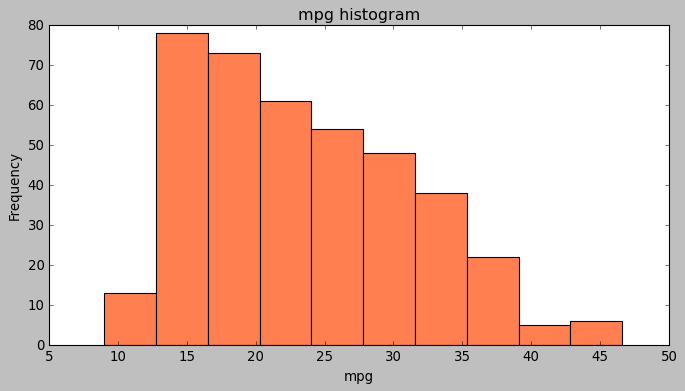

In [19]:
# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(
    kind = 'hist', # 히스토그램
    bins = 10, # (범례) 10분할(등분)
    color = 'coral',
    figsize = (10,5),
)

plt.title('mpg histogram')
plt.xlabel('mpg')

plt.show()

> 자동차의 연비 값은 대부분 좌측편향되어 연비가 낮은 구간에 집중된 경향을 보인다.

---
### 산점도(Scatter plot)
- 서로 다른 두 변수 사이의 관계를 나타낸다. (corr 등등)

In [20]:
plt.style.use('default')

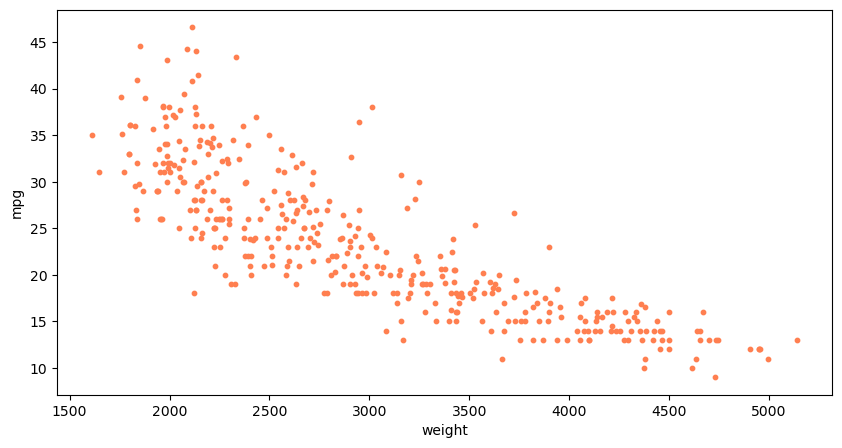

In [21]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral',
    s = 10, # 점 크기
    figsize = (10,5),
)

plt.show()

> style 마다 키의 명칭이 다르다.

> mpg와 weight의 분포는 우하향하는 경향이 있어 서로 음의 상관관계가 있다.(역상관)

In [22]:
# Cylinder 계수의 상대적 비율을 계산하여 시리즈 생성
df['cylinders'].max()
cylinder_size = df.cylinders / df.cylinders.max() * 300 # hyperparameter 값.
print(cylinder_size)

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64


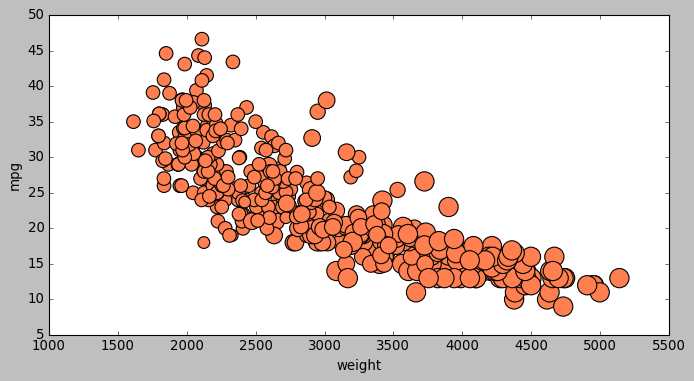

In [23]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
plt.style.use('classic')
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral',
    s = cylinder_size, # 점 크기에 상대적 비율이 적용되어있다.
    figsize = (10,5),
)

plt.show()

---
### 버블(Bubble) 차트

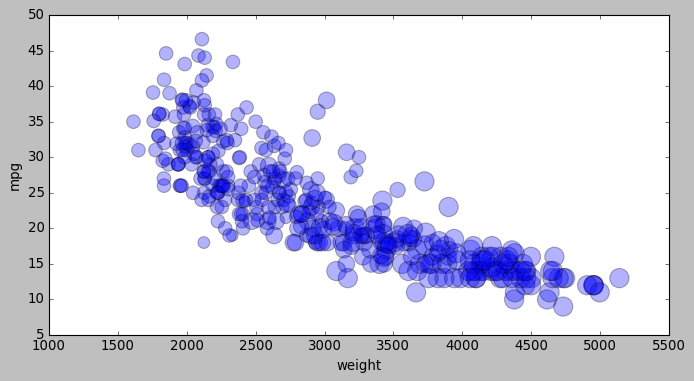

In [24]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
plt.style.use('classic')
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'blue',
    s = cylinder_size, # 점 크기에 상대적 비율이 적용되어있다.
    alpha = 0.3, # 투명하게 만들기, 버블
    figsize = (10,5),
)

plt.show()

> cylinder 수가 많을수록 무거워지고 연비도 낮아지는 경향이 있다.

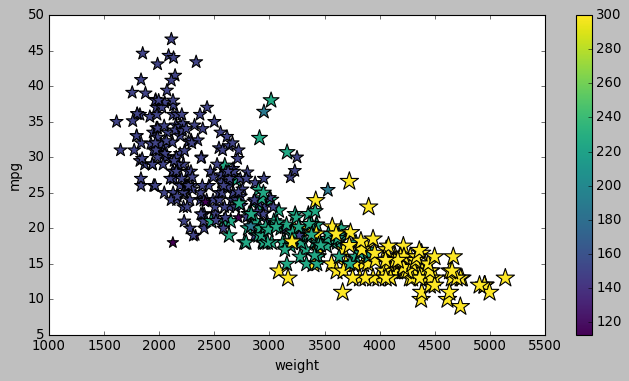

In [25]:
# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
plt.style.use('classic')
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = cylinder_size,
    s = cylinder_size, # 점 크기에 상대적 비율이 적용되어있다.
    figsize = (10,5),
    marker = '*',
    cmap = 'viridis' # color map
)

plt.show()

---
### 파이 차트(pie chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당 변수에 속하는 데이터값의 크기에 비례(%)

#### 자동차의 국가별 데이터 개수를 파이차트로 표현하기

In [26]:
plt.style.use('default')

In [27]:
# 국가별 count를 계산
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [28]:
# origin을 기준으로 그룹화하고 합계 연산하기(count수를 누계시키기 위함)
df_origin = df.groupby('origin').sum()
(df_origin)

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [29]:
# index 값을 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


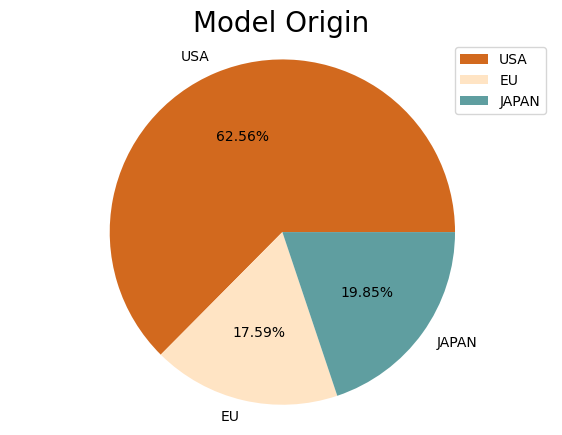

In [32]:
# 파이차트 그리기
plt.style.use('default')
df_origin['count'].plot(
    kind='pie',
    figsize=(7,5),
    autopct='%.2f%%', # 오토퍼센트 : 소수점이하 2자리, % 단위 표시
    colors=['chocolate', 'bisque', 'cadetblue']
)

plt.title("Model Origin", size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc = 'upper right')
plt.ylabel('')

plt.show()

---
### 박스플롯(boxplot)
- 범주형 데이터의 분포를 파악

#### 제조 국가별 연비분포 박스플롯

In [31]:
plt.style.use('seaborn-poster')

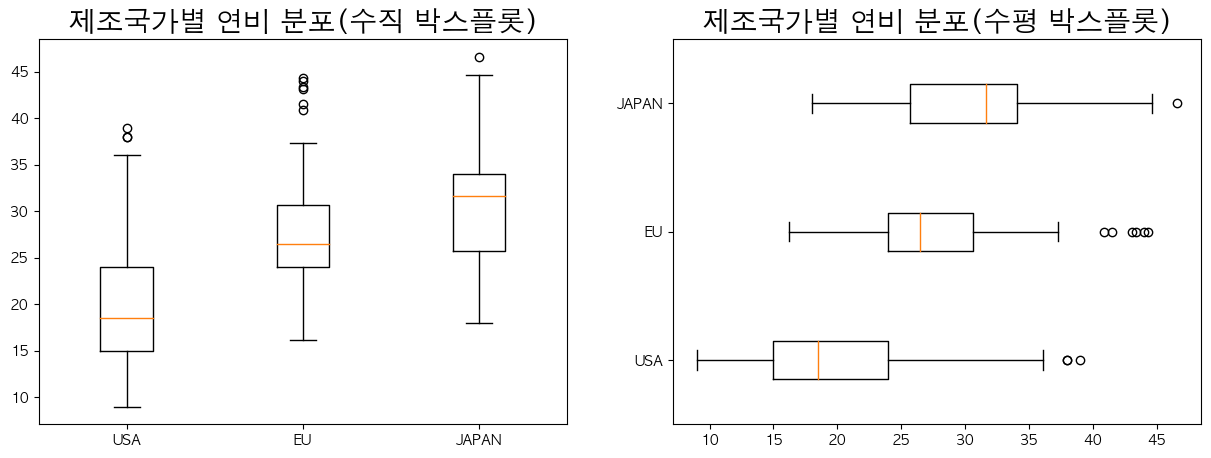

In [41]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 수직 박스플롯
ax1.boxplot(
    x=[
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg']
    ],
    labels = df_origin.index
)
ax1.set_title('제조국가별 연비 분포(수직 박스플롯)')

# 수직 박스플롯
ax2.boxplot(
    x=[
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg']
    ],
    labels = df_origin.index,
    vert = False
)
ax1.set_title('제조국가별 연비 분포(수직 박스플롯)', size=20)
ax2.set_title('제조국가별 연비 분포(수평 박스플롯)', size=20)

plt.show()

In [35]:
df[df['origin'] == 1]['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 249, dtype: float64

# 파이썬 갤리러
https://python-graph-gallery.com